# Intelligent Fashion Information Retrieval Analysis

This notebook demonstrates different retrieval strategies for fashion images:
1. **Vanilla Retrieval**: Standard dense retrieval using FashionCLIP embeddings.
2. **Compositional Retrieval**: Our custom logic for handling complex queries (e.g., "red tie AND white shirt").

We will analyze how each method performs on different types of queries.

In [1]:
import sys
import os

# Add src to path
sys.path.append(os.path.abspath("../src"))

# Env vars for macOS safety
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ["USE_TF"] = "0"

from retriever import Retriever
from PIL import Image
import matplotlib.pyplot as plt

def show_images(results, title="Results"):
    if not results:
        print(f"{title}: No results found.")
        return
        
    plt.figure(figsize=(15, 5))
    plt.suptitle(title, fontsize=16)
    for i, res in enumerate(results[:3]): # Show top 3
        path = res['path']
        img = Image.open(path)
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Score: {res['score']:.3f}\n{res['filename']}")
        plt.axis('off')
    plt.show()

/Users/arjungupta/miniconda3/envs/test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Initialize Retriever
We load the FAISS index and the FashionCLIP model.

In [2]:
retriever = Retriever(index_path="../data/index.faiss", metadata_path="../data/metadata.json")

Loading resources for Retriever...


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loaded index with 3200 vectors.


## 1. Comparing Retrieval Strategies

We will compare **Standard** logic vs **Compositional** logic on a complex query.

Running Standard Search for: 'A red tie and a white shirt'


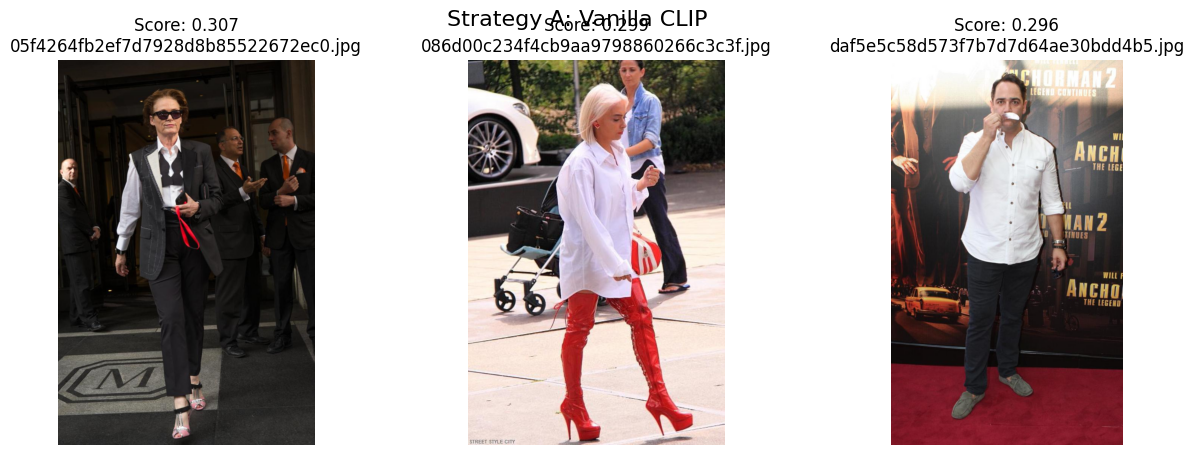

Running Compositional Search for: 'A red tie and a white shirt'
Refined Hybrid Search. Query: 'A red tie and a white shirt' -> Parts: ['a red tie', 'a white shirt']


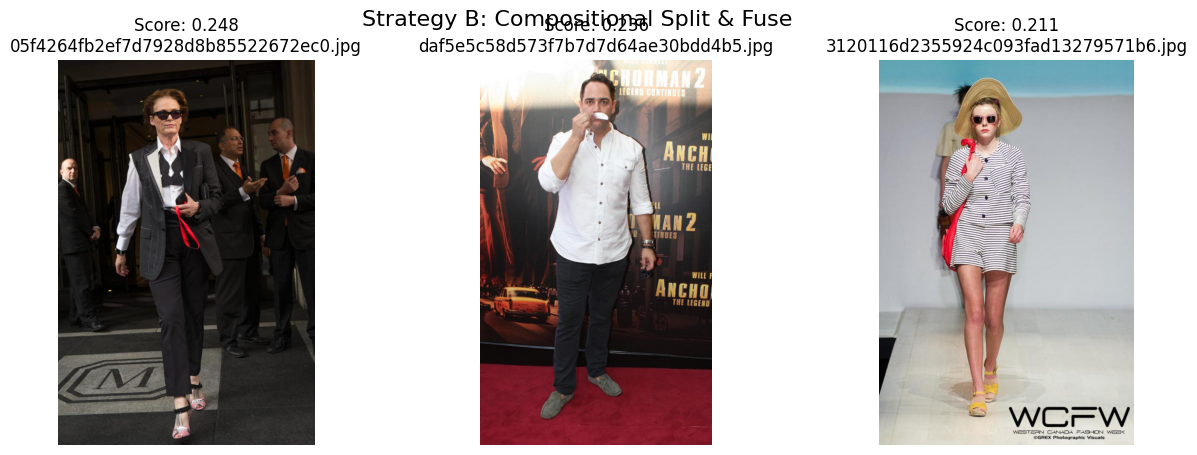

In [3]:
QUERY = "A red tie and a white shirt"

# Strategy A: Standard (Vanilla CLIP)
print(f"Running Standard Search for: '{QUERY}'")
results_std = retriever.search(QUERY, k=3, compositional=False)
show_images(results_std, title="Strategy A: Vanilla CLIP")

# Strategy B: Compositional (Ours)
print(f"Running Compositional Search for: '{QUERY}'")
results_comp = retriever.search(QUERY, k=3, compositional=True)
show_images(results_comp, title="Strategy B: Compositional Split & Fuse")

**Observation**: Vanilla CLIP often focuses on one dominant object (e.g., just the shirt) or gets confused by color binding (matching red shirts). Our compositional strategy splits the query into "red tie" and "white shirt", retrieves for both, and finds the intersection, likely yielding better results.

## 2. Exploring Query Types
Let's test the other required categories.

Testing: Attribute Specific


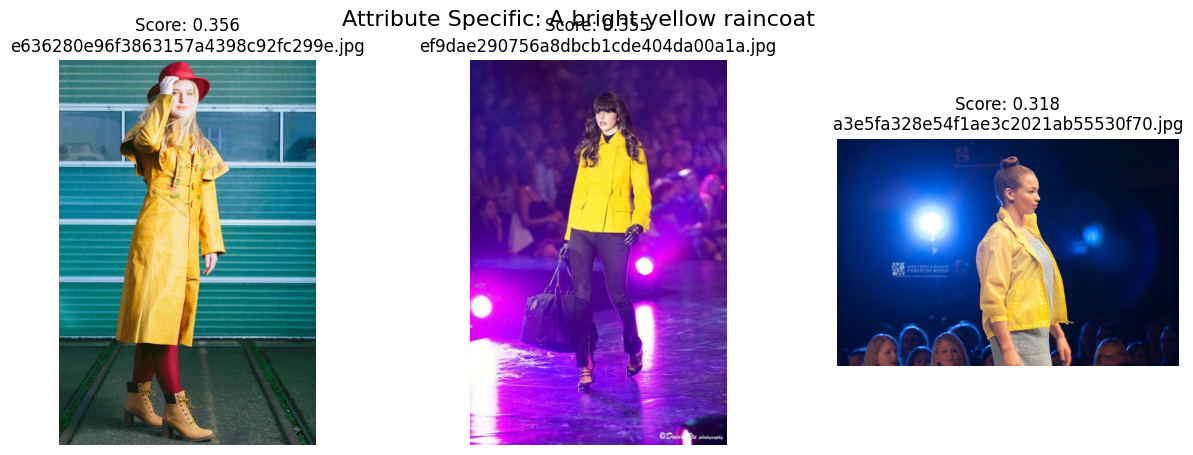

Testing: Contextual


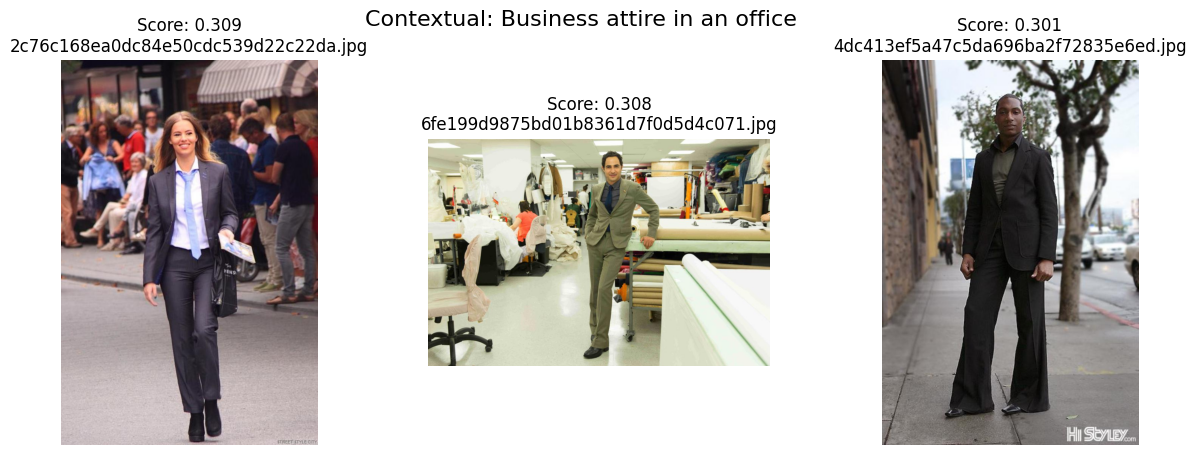

Testing: Style


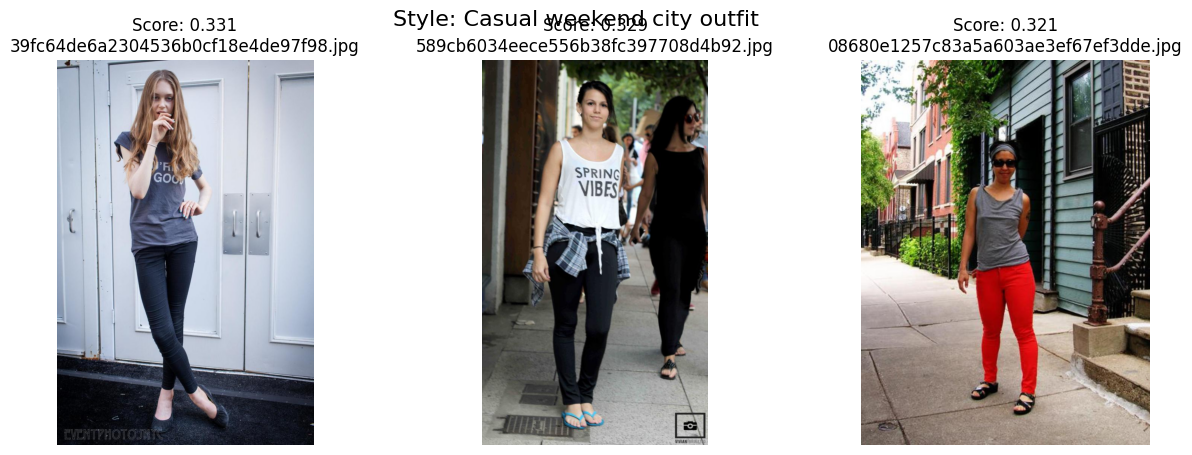

In [4]:
queries = {
    "Attribute Specific": "A bright yellow raincoat",
    "Contextual": "Business attire in an office",
    "Style": "Casual weekend city outfit"
}

for q_type, q_text in queries.items():
    print(f"Testing: {q_type}")
    res = retriever.search(q_text, k=3, compositional=True)
    show_images(res, title=f"{q_type}: {q_text}")